In [60]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [61]:
df=pd.read_csv('/content/Task_10 dataset.csv')

In [62]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [63]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,21-06-2017,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,22-06-2017,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,23-06-2017,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,24-06-2017,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,25-06-2017,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [65]:
# Step 1: Identify Null Values
null_values = df.isnull().sum()

In [66]:
print(null_values)

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [67]:
# Drop rows with any null values
df.dropna(inplace=True)

In [68]:
# After dropping null values, you may want to reset the index:
df.reset_index(drop=True, inplace=True)

In [69]:
print(df.reset_index)

<bound method DataFrame.reset_index of              Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0      01-01-2009    Cobar     17.9     35.2       0.0         12.0      12.3   
1      02-01-2009    Cobar     18.4     28.9       0.0         14.8      13.0   
2      04-01-2009    Cobar     19.4     37.6       0.0         10.8      10.6   
3      05-01-2009    Cobar     21.9     38.4       0.0         11.4      12.2   
4      06-01-2009    Cobar     24.2     41.0       0.0         11.2       8.4   
...           ...      ...      ...      ...       ...          ...       ...   
56415  20-06-2017   Darwin     19.3     33.4       0.0          6.0      11.0   
56416  21-06-2017   Darwin     21.2     32.6       0.0          7.6       8.6   
56417  22-06-2017   Darwin     20.7     32.8       0.0          5.6      11.0   
56418  23-06-2017   Darwin     19.5     31.8       0.0          6.2      10.6   
56419  24-06-2017   Darwin     20.2     31.7       0.0          5.6   

In [70]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [71]:
print(df.describe())

            MinTemp       MaxTemp      Rainfall   Evaporation      Sunshine  \
count  56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean      13.464770     24.219206      2.130397      5.503135      7.735626   
std        6.416689      6.970676      7.014822      3.696282      3.758153   
min       -6.700000      4.100000      0.000000      0.000000      0.000000   
25%        8.600000     18.700000      0.000000      2.800000      5.000000   
50%       13.200000     23.900000      0.000000      5.000000      8.600000   
75%       18.400000     29.700000      0.600000      7.400000     10.700000   
max       31.400000     48.100000    206.200000     81.200000     14.500000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am   Humidity3pm  \
count   56420.000000  56420.000000  56420.000000  56420.000000  56420.000000   
mean       40.877366     15.667228     19.786778     65.874123     49.601985   
std        13.335232      8.317005      8.510180

<ipython-input-73-c83940d0bb74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")


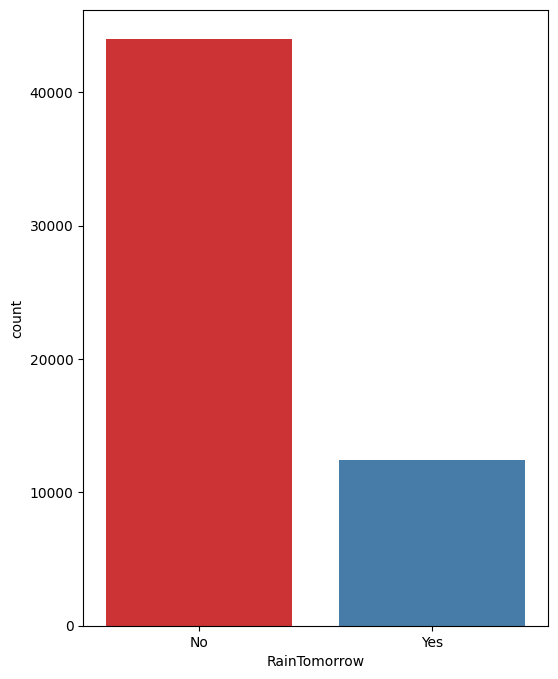

In [73]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

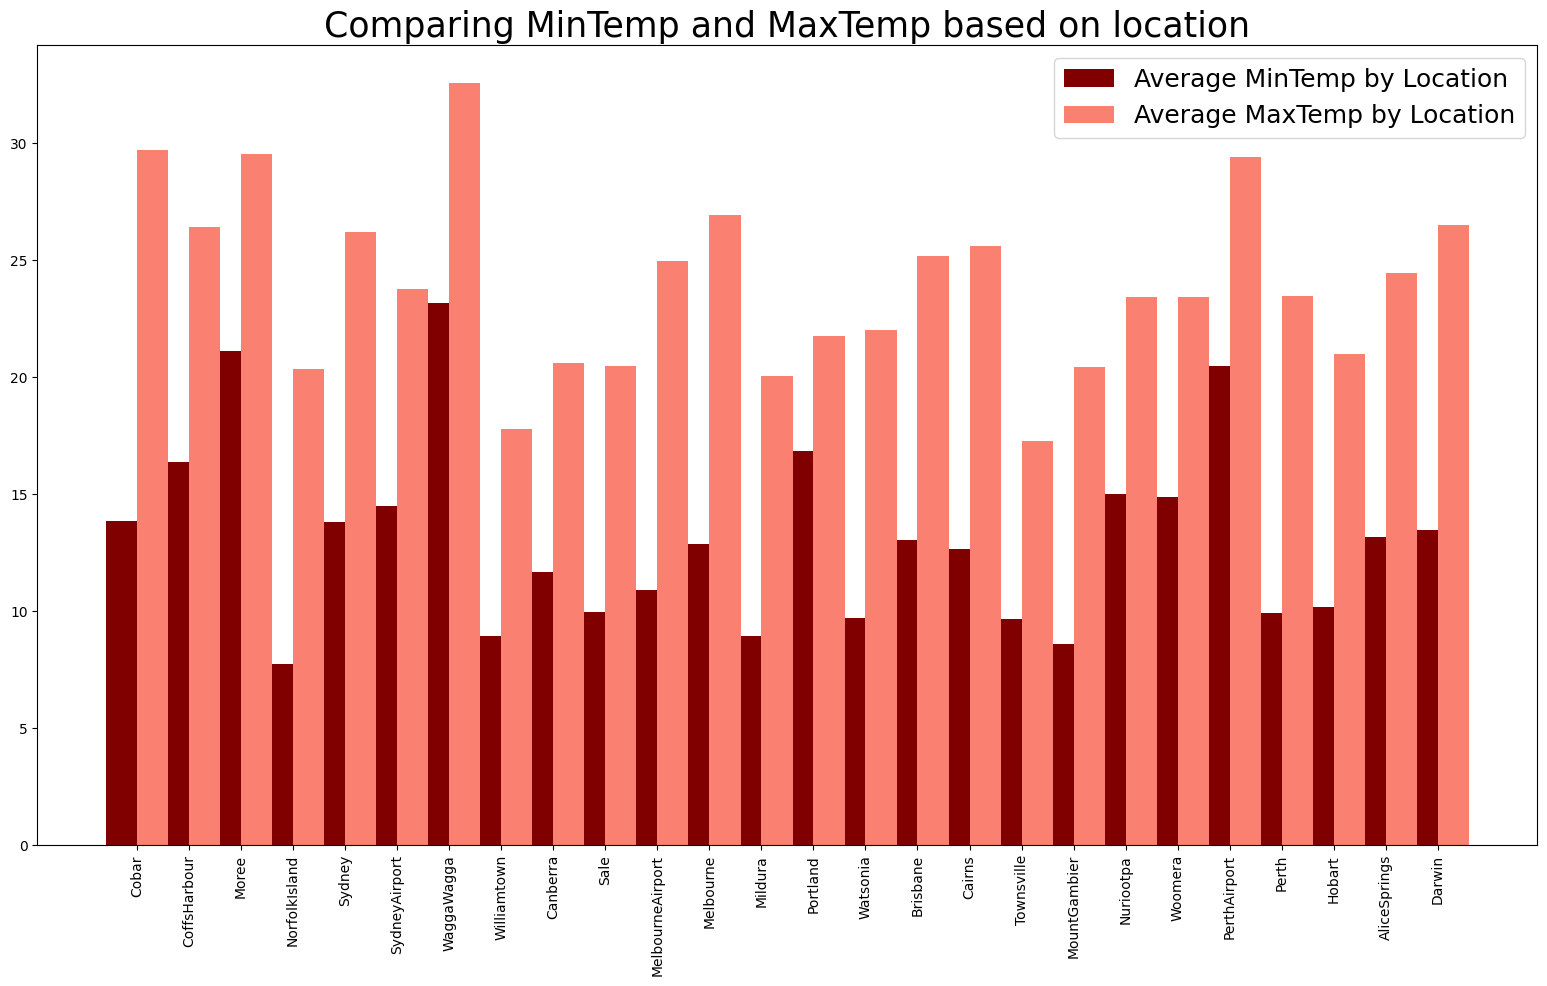

In [74]:
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.title("Comparing MinTemp and MaxTemp based on location", fontsize=25)
plt.legend(fontsize=18)

In [75]:
Year= pd.to_datetime(df.Date).dt.year

<ipython-input-75-4608cc064c46>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Year= pd.to_datetime(df.Date).dt.year


<Axes: title={'center': 'Number of row per year'}, xlabel='Date', ylabel='count'>

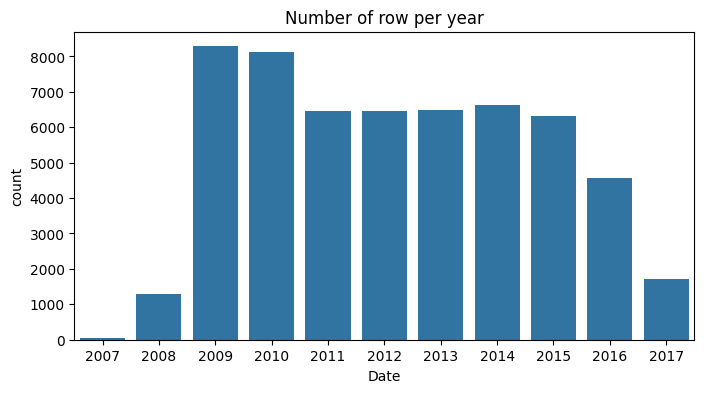

In [76]:
plt.figure(figsize=(8,4))
plt.title("Number of row per year")
sns.countplot(x=Year)

Text(0.5, 1.0, 'Rain Today - Rain Tomorrow')

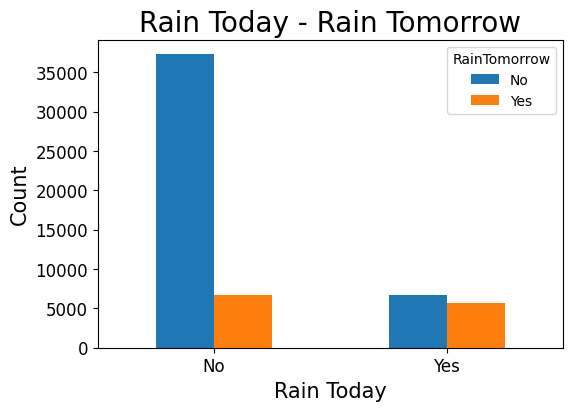

In [77]:
Today_Tomo_plot = pd.crosstab(df['RainToday'], df['RainTomorrow'])

plt.rcParams["figure.figsize"] = (6,4)

Today_Tomo_plot.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Rain Today - Rain Tomorrow', fontsize=20)

In [78]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Assuming 'X_train' and 'X_test' have categorical columns
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [87]:
# Apply standard scaling after one-hot encoding
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [88]:
print(X_train.shape)
print(X_test.shape)

(45136, 3508)
(11284, 3508)


# **Logistic Regression**

Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, logistic regression is a predictive analysis. It is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables

if we use linear regression to find the best fit line which aims at minimizing the distance between the predicted value and actual value, the line will be like this:

Logistic Regression  over linear regression
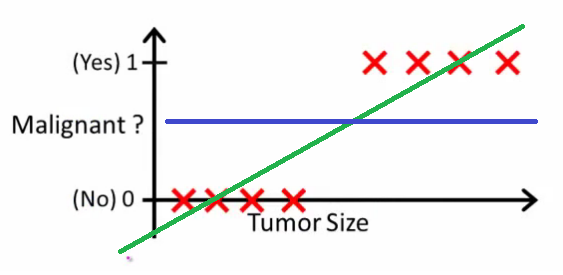

In [89]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

In [90]:
# Train the model
model.fit(X_train, y_train)
predictions = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [91]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (45136, 3508)


In [92]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8487238567883729


In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_probabilities = model.predict_proba(X_test)[:, 1]

In [95]:
# Convert string labels to numerical values (0 and 1)
y_test_binary = (y_test == 'Yes').astype(int)

In [96]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probabilities)

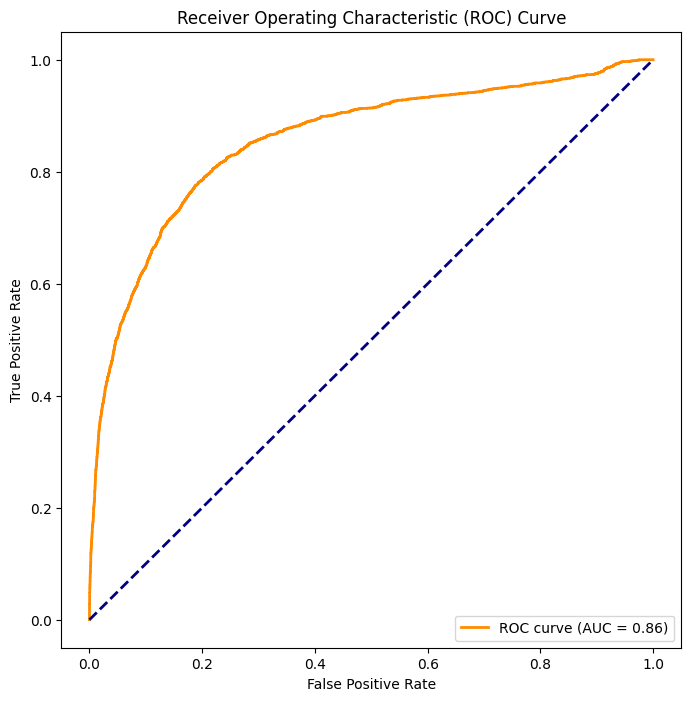

In [97]:
# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

**An AUC of 0.86 suggests that the model can effectively differentiate between the positive and negative classes. It's able to correctly classify instances most of the time.**

The higher the AUC, the better the model's overall performance. An AUC of 0.86 indicates that the model has reasonably high accuracy in its predictions.

In [98]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[8164  635]
 [1072 1413]]


In [99]:
cr = classification_report(y_test,predictions)
print("Classification Report:")
print(cr)

Classification Report:
              precision    recall  f1-score   support

          No       0.88      0.93      0.91      8799
         Yes       0.69      0.57      0.62      2485

    accuracy                           0.85     11284
   macro avg       0.79      0.75      0.76     11284
weighted avg       0.84      0.85      0.84     11284



**Overall, based on this report, we can say that the model performs reasonably well, especially for predicting the "No" class, but there is room for improvement, particularly in predicting the "Yes" class.**